# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | nagqu
Processing Record 4 of Set 1 | roslavl'
Processing Record 5 of Set 1 | muhos
Processing Record 6 of Set 1 | birzebbuga
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | mananjary
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | queenstown
Processing Record 19 of Set 1 | columbus
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | lerwick
Processing

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,21.25,28,75,6.17,CL,1707240330
1,olonkinbyen,70.9221,-8.7187,-1.16,91,78,9.69,SJ,1707240321
2,nagqu,31.5000,92.0000,-11.01,27,0,0.42,CN,1707240416
3,roslavl',53.9528,32.8639,-8.21,96,100,2.08,RU,1707240416
4,muhos,64.8080,25.9931,-19.57,100,74,1.66,FI,1707240416


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,21.25,28,75,6.17,CL,1707240330
1,olonkinbyen,70.9221,-8.7187,-1.16,91,78,9.69,SJ,1707240321
2,nagqu,31.5000,92.0000,-11.01,27,0,0.42,CN,1707240416
3,roslavl',53.9528,32.8639,-8.21,96,100,2.08,RU,1707240416
4,muhos,64.8080,25.9931,-19.57,100,74,1.66,FI,1707240416


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

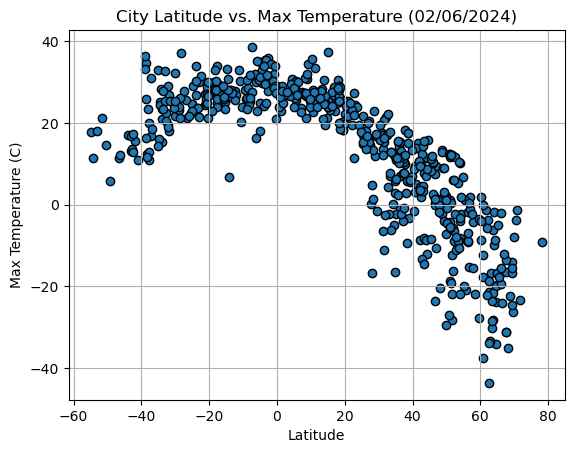

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x = x_values, y = y_values, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Incorporate the other graph properties
# I got the current_date code from Stack Overflow
current_date = pd.to_datetime("today").strftime("%m/%d/%Y")
plt.title("City Latitude vs. Max Temperature (" + current_date + ")")
plt.grid(visible = True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

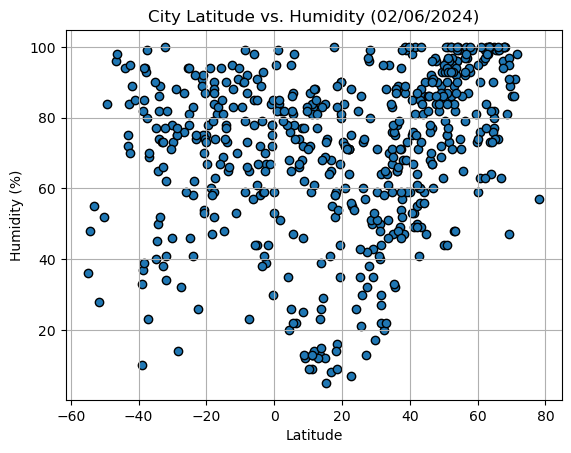

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x = x_values, y = y_values, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
current_date = pd.to_datetime("today").strftime("%m/%d/%Y")
plt.title("City Latitude vs. Humidity (" + current_date + ")")
plt.grid(visible = True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

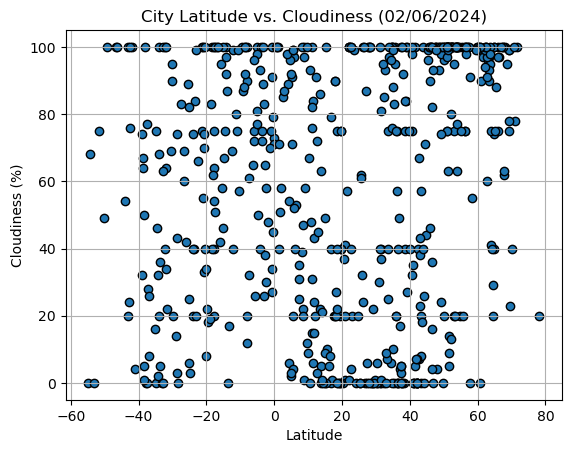

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x = x_values, y = y_values, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
current_date = pd.to_datetime("today").strftime("%m/%d/%Y")
plt.title("City Latitude vs. Cloudiness (" + current_date + ")")
plt.grid(visible = True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

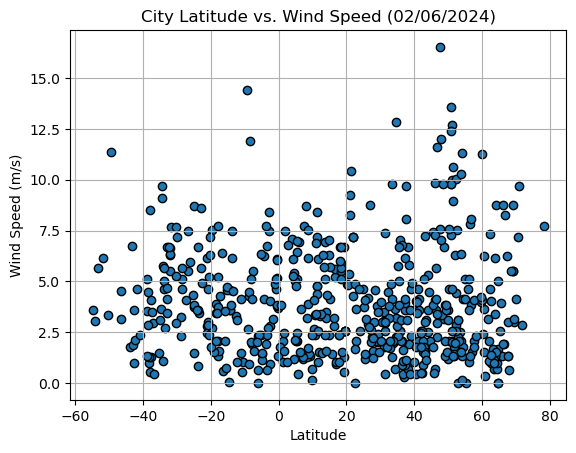

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x = x_values, y = y_values, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
current_date = pd.to_datetime("today").strftime("%m/%d/%Y")
plt.title("City Latitude vs. Wind Speed (" + current_date + ")")
plt.grid(visible = True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(text=line_eq, xy=(x.mean(),y.mean()), xytext=(x.mean(),y.mean()), xycoords="data", textcoords="offset pixels", fontsize=15, color="red")
    plt.xlabel("Latitude")
    # I got .name from the Pandas documentation after an internet search.
    plt.ylabel(y.name)
    print(f"The r-value is {rvalue}.")
    plt.show()

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,-1.16,91,78,9.69,SJ,1707240321
2,nagqu,31.5000,92.0000,-11.01,27,0,0.42,CN,1707240416
3,roslavl',53.9528,32.8639,-8.21,96,100,2.08,RU,1707240416
4,muhos,64.8080,25.9931,-19.57,100,74,1.66,FI,1707240416
5,birzebbuga,35.8258,14.5269,15.38,88,20,2.57,MT,1707240417


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,21.25,28,75,6.17,CL,1707240330
9,bredasdorp,-34.5322,20.0403,25.26,45,46,9.10,ZA,1707240417
10,port-aux-francais,-49.3500,70.2167,5.70,84,100,11.37,TF,1707240356
11,mananjary,-21.2167,48.3333,24.48,91,100,2.78,MG,1707240418
12,waitangi,-43.9535,-176.5597,17.12,94,54,1.79,NZ,1707240401


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8596038199264064.


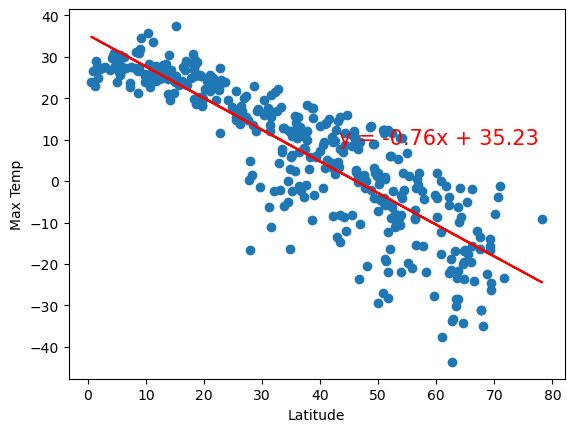

In [87]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is 0.5856783217174842.


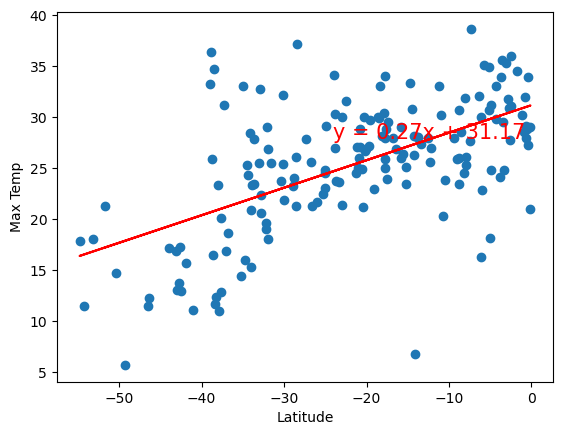

In [88]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** The graphs above show a strong correlation between latitude and max temperature. The graphs show that when moving farther away from the equator in the northern hemisphere, the max temperatures are more likely to be lower. Max temperatures are more likely to be much colder in the northern hemisphere (compared to the lowest max temp in the southern hemisphere). While the correlation between latitude and temperature is not as strong when looking at just the southern hemisphere, there is indeed a correlation showing that the closer a city is to the equator, the higher its max temp will be.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4558510748775359.


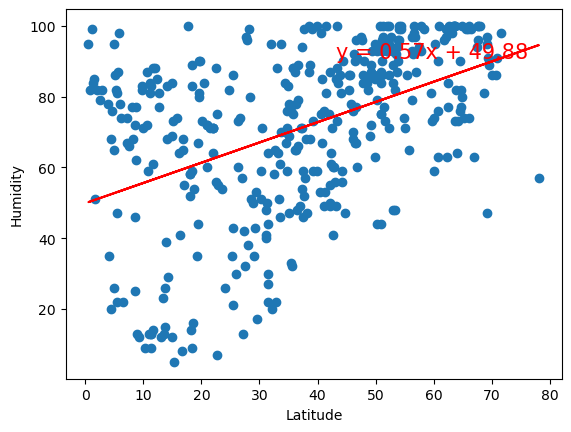

In [89]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is 0.05491517664979776.


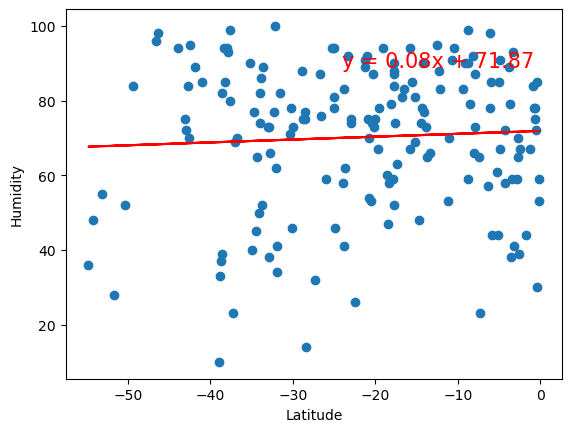

In [90]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** The differences between the northern and southern hemispheres when it comes to humidity is more striking than with temperature. The graphs above show less strong correlations between humidity and latitude. In the northern hemisphere, the correlation is stronger but not very strong. The graph of the northern hemisphere results shows that there is a large concentration of cities that are farther away from the equator and have high humidity (possibly in the form of snow). A more solid conclusion is that the farther north from the equator a city is, the more likely it will not have less than 50% humidity at this time of year. For the southern hemisphere, there is little to no correlation between latitude and humidity. There appears to be an even distribution in terms of humidity. Perhaps the strongest conclusion we can draw from this graph is that cities are more likely to be concentrated within the first 20 degrees of the equator (which makes sense, as land mass lessens the farther south you go and there is a lot of ocean and uninhabitable land to account for).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.3155423028063337.


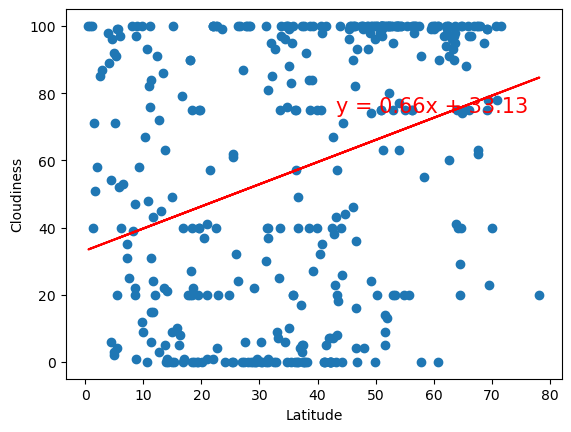

In [91]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is 0.2491025307977808.


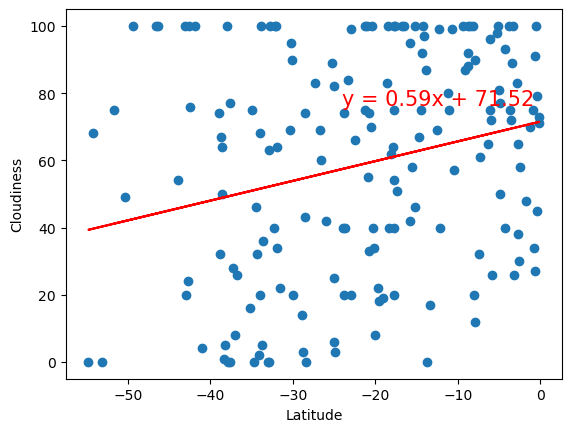

In [92]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** The correlation between latitude and cloudiness is not particularly strong for the northern or southern hemispheres. While there is a stronger correlation in the northern hemisphere, it does not appear strong enough to indicate a causal relationship. Instead, the best conclusion we can draw is that cities in the northern hemisphere are more likely to have zero clouds or be completely overcast, with total cloudiness slightly more common as you move north. There also seems to be an even distribution of 20%, 40%, and maybe 75% cloudiness across most latitudes, though they are more prevelant in latitudes 10 through 40.

For the southern hemisphere, there is more of a distribution of cloudiness levels, with a slight correlation of cloudiness increasing the closer cities are to the equator. Generally, cloudiness seems to vary evenly. The graph does show that many cities across most latitudes (primarily -40 through 0) have 100% cloudiness, and that prevelance increases the closer one gets to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.02068284730748381.


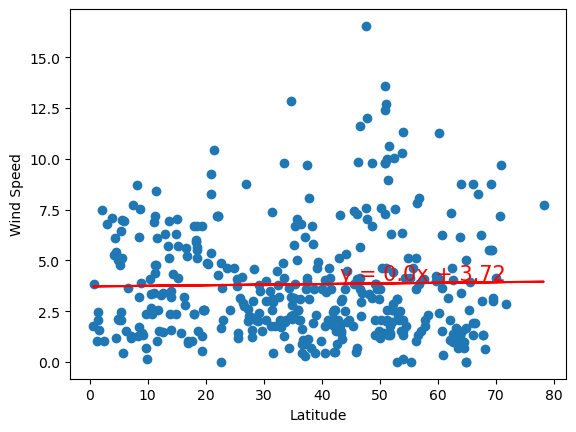

In [93]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is -0.07784211879142865.


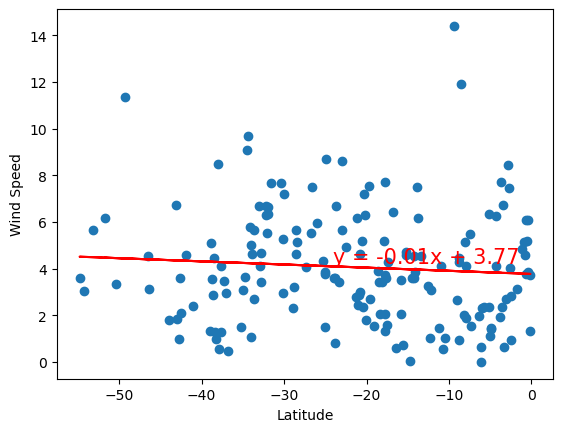

In [94]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** Wind speed and latitude also appear to have very little to no correlation. In both northern and southern hemispheres, wind speed is typically lower than 8 m/s across all latitudes. Interestingly, at the 50th latitude in the northern hemisphere, there are many cities with varying wind speeds ranging from all recorded speeds (including above 15 m/s). However, more data is needed to establish a causal relationship between the latitude and wind speed (it could be that there are simply more cities at that latitude, or topography influences wind speed for certain cities if a city is located in the mountains, for example).

The southern hemisphere also has little to no correlation. However, around latitude -10, there are some cities with what appear to be outliers of very high wind speeds. Again, there simply seem to be fewer cities in the southern hemisphere, at least in this dataset.